In [874]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

#https://trovo.faculty.polimi.it/01papers/vittori2020portfolio.pdf

In [875]:
''' 

Download historic prices of 10 stocks for experimenting 

'''

stocks = pd.read_excel("/Users/af/Downloads/grid1_pzafurjz.xlsx")
stocks.rename(columns= {'Unnamed: 0': "Date"},inplace = True)
stocks = stocks[stocks["Date"].isna() == False]

In [876]:
#reverse order of dates
stocks = stocks[::-1]
stocks = stocks.reset_index()
stocks.drop("index", axis = 1, inplace = True)

In [877]:
stocks = stocks[stocks["META US Equit"] != " "]

In [878]:
stocks.loc[stocks["RACE IM Equit"] == " ",
          ["IBE SM Equity","RACE IM Equit"]] = np.array(stocks.iloc[[66,81]][["IBE SM Equity","RACE IM Equit"]])

In [879]:
stocks = stocks.reset_index().drop("index", axis = 1)


In [880]:
#create return matrix
returns = stocks.drop("Date", axis=1).astype(float)[1:].reset_index().sub(stocks.drop("Date", axis=1).astype(float)[:-1].reset_index(), axis =1)
returns.drop("index",inplace = True,axis =1)

In [881]:
returns = returns.div(stocks.drop("Date", axis=1).astype(float)[:-1].reset_index().drop("index",axis = 1)) *100

In [851]:
#set initial setting

budget = 10**5
transaction_cost = 10
weights = np.random.dirichlet(np.ones(10), size=1)[0]  
#todo: since we know prior historical returns there may be a way to select initial weights with logic and not randomly


In [690]:
#compute number of stocks with initial random weight and round down to get integer values

initial_stocks = weights * budget / stocks.loc[2][1:]
initial_stocks = np.floor(initial_stocks)
remaining_budget = budget - np.sum(initial_stocks * stocks.loc[2][1:])
weights = initial_stocks * stocks.loc[2][1:] / (budget - remaining_budget)

In [691]:
initial_stocks

META US Equit    200
AAPL US Equit     47
MSFT US Equit     21
CAT US Equity     32
BAC US Equity    673
IBE SM Equity    179
RACE IM Equit     33
NVDA US Equi      41
QQQ US Equity     68
ORGN US Equi      75
Name: 2, dtype: object

In [852]:
def transaction_costs(time=2,mode = "single transaction",budget = budget, 
                      transaction_cost = transaction_cost, initial_stocks = initial_stocks, 
                      perc = 0.2, new_stocks = []):
    
    if len(new_stocks) == 0:
        weights, remaining_budget, new_stocks = compute_random_weights(t = time)
        #remaining_budget = budget - np.sum(initial_stocks * stocks.loc[0][1:])
        #new_stocks = weights * (budget-remaining_budget) /  stocks.loc[2][1:] 

    
    diff = np.abs(initial_stocks - new_stocks)

    #Counting each transaction as unique, without considering the amount of stocks, but just how many different stocks we trade
    if mode == "single transaction":
        print(f"for time = {time} we had {(diff != 0).sum()} transactions")
        return (diff != 0).sum() * transaction_cost
    
    #Counting each stock as a transaction
    if mode == "single stock":
        print(f"for time = {time} we had {diff.sum()} transactions")
        return  diff.sum() *transaction_cost

    #Counting each stock as a transaction but with the percentage of the value of the stock
    if mode == "percentage":
        print(f"for time = {time} we had {diff.sum()} transactions")
        return (diff * stocks.loc[time][1:] * perc / 100).sum()

In [460]:
#All process with slight variations of weights

#TODO: Understainf why some weights slitghly change when they should not (all the odd number of transactions are wrong)

prova = initial_stocks.copy()
s = prova.copy()
tr = 0
w = weights.copy()



#updating weights and transaction cost each day
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    #print(w)
    #changing two random weights with a small quantity 
    num1,num2 = np.abs(np.random.randn() / 10), np.abs(np.random.randn() / 10)
    a1,a2 = np.random.randint(len(w)),np.random.randint(len(s))
    
    #if the new weight is below 0 don't update
    if w[a1] - num1 >0 :  
        w[a1],w[a2] = w[a1] - num1, w[a2] + num1 
    
    #with 50% possibility change other 2 random weigths (they could be the same as first step)
    if a1 > 4:
        a1,a2 = np.random.randint(len(w)),np.random.randint(len(s))
        if  w[a1] - num2 > 0:
            w[a1],w[a2] = w[a1] - num2, w[a2] + num2 
        
    
    #print(w)
    #updating positions and weights using previous function logic 
    s = w * (budget - remaining_budget) / stocks.loc[i][1:]
    s = np.floor(s)

    
    #computing how much budget we have removing the decimals and recomputing the right weights 
    remaining_budget = budget - np.sum(s * stocks.loc[i][1:])
    w = s * stocks.loc[i][1:] / (budget - remaining_budget)
    
  
    #computing transaction costs
    tr += transaction_costs(initial_stocks = prova, new_stocks = s,mode = "single stock", time = i, perc = 0.2)
   
    #setting the portofolio of t-1
    prova = s.copy()
    
    #updating the budget 
    budget = np.sum(s * stocks.loc[i+1][1:]) + remaining_budget
    
    #updating the weights 
    w = s * stocks.loc[i+1][1:] / (budget - remaining_budget)


print(f"final budget is equal to {round(budget,2)},but we incurred {round(tr,2)} of transaction costs, so we have {round(budget - tr,2)} money")



for time = 2 we had 155 transactions
for time = 3 we had 867 transactions
for time = 4 we had 2 transactions
for time = 5 we had 4 transactions
for time = 6 we had 439 transactions
for time = 7 we had 134 transactions
for time = 8 we had 0 transactions
for time = 9 we had 1 transactions
final budget is equal to 110181.48,but we incurred 16020 of transaction costs, so we have 94161.48 money


In [414]:
initial_stocks

META US Equit      16
AAPL US Equit      79
MSFT US Equit      36
CAT US Equity      26
BAC US Equity     587
IBE SM Equity    1389
RACE IM Equit       9
NVDA US Equi       24
QQQ US Equity      69
ORGN US Equi     2844
Name: 2, dtype: object

In [415]:
s

META US Equit      41
AAPL US Equit      54
MSFT US Equit      57
CAT US Equity      73
BAC US Equity     135
IBE SM Equity    1696
RACE IM Equit       9
NVDA US Equi        9
QQQ US Equity     108
ORGN US Equi      359
dtype: object

In [401]:
weights * (budget - remaining_budget) / stocks.loc[2][1:]

META US Equit      72
AAPL US Equit      63
MSFT US Equit      15
CAT US Equity     124
BAC US Equity     288
IBE SM Equity    2543
RACE IM Equit       4
NVDA US Equi       17
QQQ US Equity      11
ORGN US Equi      878
Name: 2, dtype: object

In [391]:
w

META US Equit     0.123253
AAPL US Equit    0.0264812
MSFT US Equit    0.0555576
CAT US Equity    0.0626208
BAC US Equity     0.083452
IBE SM Equity     0.192549
RACE IM Equit    0.0628428
NVDA US Equi      0.128454
QQQ US Equity    0.0053332
ORGN US Equi      0.259457
Name: 2, dtype: object

In [388]:
weights

META US Equit      0.122916
AAPL US Equit     0.0264089
MSFT US Equit      0.101176
CAT US Equity     0.0648516
BAC US Equity     0.0377372
IBE SM Equity      0.192023
RACE IM Equit     0.0626711
NVDA US Equi       0.128103
QQQ US Equity    0.00531864
ORGN US Equi       0.258794
Name: 2, dtype: object

In [382]:
def compute_random_weights(t = 0):
    
    #compute weights that sum up to 1
    weights = np.random.dirichlet(np.ones(10), size=1)[0]

    #computing how many stocks the weight represent and make them integers  
    initial_stocks = weights * budget / stocks.loc[t][1:]
    initial_stocks = np.floor(initial_stocks)
    
    #computing how much budgt we have removing the decimals and recomputing the right weights 
    remaining_budget = budget - np.sum(initial_stocks * stocks.loc[0][1:])
    weights = initial_stocks * stocks.loc[0][1:] / (budget - remaining_budget)
    
    return weights,remaining_budget,initial_stocks

In [27]:
weights_1 = compute_random_weights(t = 2)[0]

In [29]:
new_stocks = weights_1 * (budget-remaining_budget) /  stocks.loc[2][1:]   #to change with new remaining budget

In [183]:
transaction_costs(mode = "percentage", time = 5, perc = 0.5)

566.59732175

In [55]:
transaction_costs()

100

In [958]:
np.array([1 / EW.num_stocks] * EW.num_stocks) * EW.budget 

array([9559.83904818, 9559.83904818, 9559.83904818, 9559.83904818,
       9559.83904818, 9559.83904818, 9559.83904818, 9559.83904818,
       9559.83904818, 9559.83904818, 9559.83904818])

In [1071]:
class HedgeAlgorithm:
    def __init__(self, num_stocks):
        self.num_stocks = num_stocks
        self.weights = np.ones(num_stocks) / num_stocks
    
    def update_weights(self, weights, loss_vector, learning_rate):
        exponentiated_losses = np.exp(-learning_rate * loss_vector)
        self.weights = weights * exponentiated_losses / np.sum(weights * exponentiated_losses)
    
    def get_weights(self):
        return self.weights


class OnlineGradientDescent:
    def __init__(self, num_stocks, learning_rate):
        self.num_stocks = num_stocks
        self.learning_rate = learning_rate
        self.weights = np.ones(num_stocks) / num_stocks
        self.Lambda = 0
    
    def update_lambda(self, gradient_vector,cost):
        
        new_lambda = self.Lambda + self.learning_rate * (gradient_vector - cost)
        
        if new_lambda <0 :
            self.Lambda = 0 

        if new_lambda > 1/ gradient_vector:
            self.Lambda = 1/ gradient_vector
            
        else:
            self.Lambda = new_lambda
            

    def get_lambda(self):
        return self.Lambda


# Utility function to generate random loss vector for Hedge algorithm
def generate_loss_vector(t):
    return self.returns[t] + (self.Lambda * (self.budget - transaction_cost()))



In [1072]:
class EquallyWeightedPortfolio:
    def __init__(self, stocks):
        self.stocks = stocks
        self.num_stocks = len(stocks.columns) -1
        self.weights = self.calculate_weights()
        self.budget = 100000
        
        initial_stocks = self.weights * self.budget / self.stocks.loc[0][1:]
        self.initial_stocks = np.floor(initial_stocks)
        self.remaining_budget = self.budget - np.sum(self.initial_stocks * self.stocks.loc[2][1:])
        
        self.transaction_cost = 10

    def calculate_weights(self):
        return np.array([1 / self.num_stocks] * self.num_stocks)
    
    def transaction_costs(self,time=2,mode = "single transaction",budget = None, 
                         transaction_cost = None, initial_stocks = None, perc = 0.2, new_stocks = []):
        
        if budget is None:
            budget = self.budget
        if transaction_cost is None:
            transaction_cost = self.transaction_cost
        if initial_stocks is None:
            initial_stocks = self.initial_stocks


        diff = np.abs(initial_stocks - new_stocks)

        #Counting each transaction as unique, without considering the amount of stocks, but just how many different stocks we trade
        if mode == "single transaction":
            print(f"for time = {time} we had {(diff != 0).sum()} transactions")
            return (diff != 0).sum() * transaction_cost

        #Counting each stock as a transaction
        if mode == "single stock":
            print(f"for time = {time} we had {diff.sum()} transactions")
            return  diff.sum() *transaction_cost

        #Counting each stock as a transaction but with the percentage of the value of the stock
        if mode == "percentage":
            print(f"for time = {time} we had {diff.sum()} transactions")
            return (diff * stocks.loc[time][1:] * perc / 100).sum()

    def rebalance_portfolio(self,time,mode = "Single Transaction"):
        self.weights = self.calculate_weights()
        self.portfolio = self.weights * (self.budget - self.remaining_budget) / self.stocks.loc[time][1:]
        self.portfolio = np.floor(self.portfolio)


        #computing how much budget we have by removing the decimals  
        self.new_remaining_budget = self.budget - np.sum(self.portfolio * self.stocks.loc[time][1:])
        #self.weights = self.portfolio * self.stocks.loc[t][1:] / (self.budget - self.remaining_budget)
        
        #computing transaction costs
        self.tr = self.transaction_costs(initial_stocks = self.initial_stocks, new_stocks = self.portfolio,mode = mode, time = t, perc = 0.2)
        
        #setting the portofolio of t-1
        self.initial_stocks = self.portfolio.copy()

        #updating new remaining budget
        self.remaining_budget = self.new_remaining_budget

        #updating the budget 
        self.budget = np.sum(self.portfolio * self.stocks.loc[t+1][1:]) + self.remaining_budget - self.tr

        #updating the weights 
        self.weights = self.portfolio * self.stocks.loc[t+1][1:] / (self.budget - self.remaining_budget)

        #updating the transaction costs budget
        #self.transaction_cost_budget -= self.tr
        
        
        #return (stocks.loc[time][1:] * self.weights).sum(axis=1)


In [1086]:
EW = EquallyWeightedPortfolio(stocks)

In [1074]:
class OnlinePortfolioSelection:
    
    def __init__(self,stock,returns):
        self.stocks = stock
        self.budget = 10**5
        self.transaction_cost = 10
        self.returns = returns
        
        weights = np.array([1 / (len(stock.columns) -1) ] * (len(stock.columns) -1))   #uniform distribution at the start 
        initial_stocks = weights * self.budget / self.stocks.loc[0][1:]
        self.initial_stocks = np.floor(initial_stocks)
        self.remaining_budget = self.budget - np.sum(self.initial_stocks * self.stocks.loc[0][1:])
        self.weights = self.initial_stocks * self.stocks.loc[0][1:] / (self.budget - self.remaining_budget)
        
        self.cumulative_regret = 0
        
        
        #initialize lambda = 0
        self.Lambda = 0
        
        self.eta = 0.02
        
        self.transaction_cost_budget = 1000
        
        
        
    def transaction_costs(self,time=2,mode = "single transaction",budget = None, 
                         transaction_cost = None, initial_stocks = None, perc = 0.2, new_stocks = []):
        
        if budget is None:
            budget = self.budget
        if transaction_cost is None:
            transaction_cost = self.transaction_cost
        if initial_stocks is None:
            initial_stocks = self.initial_stocks


        diff = np.abs(initial_stocks - new_stocks)

        #Counting each transaction as unique, without considering the amount of stocks, but just how many different stocks we trade
        if mode == "single transaction":
            print(f"for time = {time} we had {(diff != 0).sum()} transactions")
            return (diff != 0).sum() * transaction_cost

        #Counting each stock as a transaction
        if mode == "single stock":
            print(f"for time = {time} we had {diff.sum()} transactions")
            return  diff.sum() *transaction_cost

        #Counting each stock as a transaction but with the percentage of the value of the stock
        if mode == "percentage":
            print(f"for time = {time} we had {diff.sum()} transactions")
            return (diff * stocks.loc[time][1:] * perc / 100).sum()
    
    
    
    def loss(self,t):
        
        #this because i have to udnerstand how to calculate transaction_cost without new weights
        if self.Lambda != 0:
            loss = self.returns.iloc[t] + (self.Lambda * (self.budget - self.tr))
        else:
            loss = self.returns.iloc[t]
        return loss
        
    def regret(self,t):
        
        #to change with best expected stratgey weights (?)
        best_return = np.argmax((self.stocks.loc[t+1][1:]  - self.stocks.loc[t][1:]) / self.stocks.loc[t][1:])
        best_weight = np.zeros(10)
        best_weight[best_return] = 1
         
        return (best_weight * stocks.loc[t+1][1:]) - (self.weights * stocks.loc[t+1][1:])
        
    def rebalance_portfolio(self,t,new_weights,mode = "single transaction"):
        
        
        #updating positions and weights using previous function logic 
        self.portfolio = new_weights * (self.budget - self.remaining_budget) / self.stocks.loc[t][1:]
        self.portfolio = np.floor(self.portfolio)


        #computing how much budget we have by removing the decimals  
        self.new_remaining_budget = self.budget - np.sum(self.portfolio * self.stocks.loc[t][1:])
        #self.weights = self.portfolio * self.stocks.loc[t][1:] / (self.budget - self.remaining_budget)
        
        #computing transaction costs
        self.tr = self.transaction_costs(initial_stocks = self.initial_stocks, new_stocks = self.portfolio,mode = mode, time = t, perc = 0.2)
        
        
        #if we have enough budget update the weights
        if self.transaction_cost_budget >= self.tr:
            
            #setting the portofolio of t-1
            self.initial_stocks = self.portfolio.copy()
            
            #updating new remaining budget
            self.remaining_budget = self.new_remaining_budget

            #updating the budget 
            self.budget = np.sum(self.portfolio * self.stocks.loc[t+1][1:]) + self.remaining_budget - self.tr

            #updating the weights 
            self.weights = self.portfolio * self.stocks.loc[t+1][1:] / (self.budget - self.remaining_budget)
            
            #updating the transaction costs budget
            self.transaction_cost_budget -= self.tr
            
            print(f"The weights have been updated and the new cost budget is {self.transaction_cost_budget}")
            
        #if we don't have enuough budget:
        else:
            self.portfolio = self.initial_stocks
            
            self.budget = np.sum(self.portfolio * self.stocks.loc[t+1][1:]) + self.remaining_budget


            
            print(f"the transaction cost is too high, the weights did not update")
            
        
        
        
    
    
    
        
        #remaining_budget = budget - np.sum(positions)
        #self.weights = positions / np.sum(positions)
        return remaining_budget
    
    
    
#primo step: Primal player finds w with Hedge
# if costs > Budget: Do not update
# if costs < Budget: Update new weights and new Budget

#terzo step: Dual player finds \lambda with OGD

#quarto step: Aggiorna Hedge loss 

#ripeti per t da 1 a T

In [1085]:
Portfolio = OnlinePortfolioSelection(stock = stocks, returns = returns )
hedge = HedgeAlgorithm(num_stocks)
ogd = OnlineGradientDescent(num_stocks, learning_rate)

In [1084]:
learning_rate = 0.005

for time = 0 we had 19 transactions
The weights have been updated and the new cost budget is 998.00754884
for time = 0 we had 14 transactions
for time = 1 we had 58 transactions
The weights have been updated and the new cost budget is 995.9771769800001
for time = 1 we had 52 transactions
for time = 2 we had 8 transactions
The weights have been updated and the new cost budget is 994.3798076600001
for time = 2 we had 122 transactions
for time = 3 we had 30 transactions
The weights have been updated and the new cost budget is 991.8983422400001
for time = 3 we had 35 transactions
for time = 4 we had 33 transactions
The weights have been updated and the new cost budget is 990.2837221800002
for time = 4 we had 57 transactions
for time = 5 we had 16 transactions
The weights have been updated and the new cost budget is 988.4757861800001
for time = 5 we had 67 transactions
for time = 6 we had 6 transactions
The weights have been updated and the new cost budget is 986.7315843800001
for time = 6 

for time = 59 we had 25 transactions
The weights have been updated and the new cost budget is 872.38434538
for time = 59 we had 23 transactions
for time = 60 we had 40 transactions
The weights have been updated and the new cost budget is 870.39717618
for time = 60 we had 49 transactions
for time = 61 we had 30 transactions
The weights have been updated and the new cost budget is 868.59496468
for time = 61 we had 79 transactions
for time = 62 we had 38 transactions
The weights have been updated and the new cost budget is 865.2548124799999
for time = 62 we had 64 transactions
for time = 63 we had 39 transactions
The weights have been updated and the new cost budget is 862.24643566
for time = 63 we had 35 transactions
for time = 64 we had 56 transactions
The weights have been updated and the new cost budget is 859.45475462
for time = 64 we had 33 transactions
for time = 65 we had 3 transactions
The weights have been updated and the new cost budget is 858.43760474
for time = 65 we had 57 t

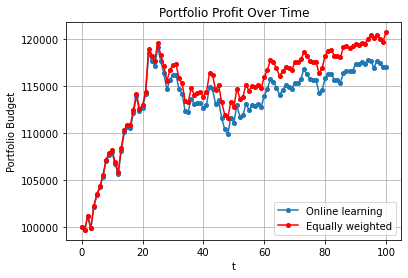

In [1087]:
andamento = []
andamento_EW = []
for t in range(0,len(stocks)-1):
    andamento.append(Portfolio.budget)
    #find new weights using hedge
    hedge.update_weights(Portfolio.weights,Portfolio.loss(t), learning_rate)  
    hedge_weights = hedge.get_weights()
    
    #Check if the new weights don't exceed the cost budget and update the portfolio
    Portfolio.rebalance_portfolio(t=t,new_weights = hedge_weights,mode = "percentage")
    
    #Update dual player strategy
    ogd.update_lambda(p,Portfolio.tr)   
    Portfolio.Lambda = ogd.get_lambda()
    
    #ew update
    andamento_EW.append(EW.budget)
    #find new weights using hedge
 
    #Check if the new weights don't exceed the cost budget and update the portfolio
    EW.rebalance_portfolio(time=t, mode = "percentage")
    
    

plt.plot([i for i in range(0,len(stocks)-1)], andamento, marker='o', linestyle='-',markersize = 4,label='Online learning')
plt.plot([i for i in range(0,len(stocks)-1)], andamento_EW, marker='o', linestyle='-',markersize = 4,color = "red",label='Equally weighted')

plt.xlabel('t')
plt.ylabel('Portfolio Budget')
plt.title('Portfolio Profit Over Time')
plt.grid(True)

plt.legend()

# Display the plot
plt.show()



    

In [1036]:
Portfolio.portfolio

META US Equit       7
AAPL US Equit      21
MSFT US Equit       0
CAT US Equity       2
BAC US Equity     358
IBE SM Equity     929
RACE IM Equit       0
NVDA US Equi        0
QQQ US Equity       0
ORGN US Equi     2612
dtype: object

In [1039]:
Portfolio.weights

META US Equit    0.0471459
AAPL US Equit    0.0946894
MSFT US Equit            0
CAT US Equity    0.0108877
BAC US Equity     0.260496
IBE SM Equity     0.294109
RACE IM Equit            0
NVDA US Equi             0
QQQ US Equity            0
ORGN US Equi       0.29271
dtype: object

In [1077]:
Portfolio.Lambda

0.102

In [1052]:
ogd.__class__

__main__.OnlineGradientDescent

In [1062]:
for x in _ih:
    if "class HedgeAlgorithm" in x:
        print(x)

import numpy as np

class HedgeAlgorithm:
    def __init__(self, num_stocks):
        self.num_stocks = num_stocks
        self.weights = np.ones(num_stocks) / num_stocks
    
    def update_weights(self, loss_vector, learning_rate):
        exponentiated_losses = np.exp(-learning_rate * loss_vector)
        self.weights = self.weights * exponentiated_losses / np.sum(self.weights * exponentiated_losses)
    
    def get_weights(self):
        return self.weights


class OnlineGradientDescent:
    def __init__(self, num_stocks, learning_rate):
        self.num_stocks = num_stocks
        self.learning_rate = learning_rate
        self.weights = np.ones(num_stocks) / num_stocks
    
    def update_weights(self, gradient_vector):
        self.weights = self.weights - self.learning_rate * gradient_vector
        self.weights = self.weights / np.sum(self.weights)
    
    def get_weights(self):
        return self.weights


# Utility function to generate random returns
def generate_returns(

In [ ]:
"Class"